# Basics

In [25]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from matplotlib import pyplot as plt
import skimage
%matplotlib inline
plt.style.use('ggplot')

## Operations, numpy bridge

tensor([[ 0.3183,  0.5556,  0.8402],
        [ 0.6460,  0.1171,  0.7683],
        [ 0.8151,  0.3341,  0.9298],
        [ 0.2922,  0.4836,  0.0719],
        [ 0.0995,  0.6471,  0.1545]])


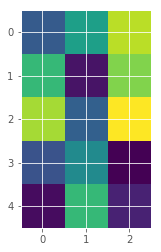

In [29]:

x = torch.rand(5, 3)
print(x)
plt.imshow(x.numpy())


 0.5519  0.8384  0.5514
 0.6694  0.9457  0.1757
 0.1766  0.5936  0.9275
 0.2535  0.8646  0.8211
 0.8800  0.7803  0.9888
[torch.FloatTensor of size 5x3]


 0.3300  0.7715  0.9477
 0.1017  0.4909  0.5360
 0.9550  0.2000  0.6462
 0.9111  0.7689  0.6973
 0.6403  0.7425  0.1426
[torch.FloatTensor of size 5x3]



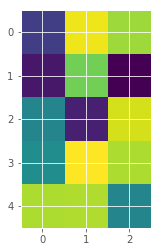

In [4]:
tmp = np.random.rand(5,3).astype(np.float32)
y = torch.from_numpy(tmp)
print(y)
print(x)
z = x + y
plt.imshow(z.numpy())

In [6]:
# resize:
r = z.view(15)
print(r)


 1.1205
 0.9972
 0.6365
 0.6528
 0.8729
 1.2123
 1.2475
 1.8739
 1.7292
 0.9219
 0.4527
 1.3260
 0.4279
 0.6652
 1.1492
[torch.FloatTensor of size 15]



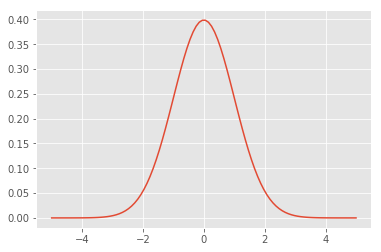

In [30]:
x = torch.linspace(-5, 5, 100)

mean = 0
sigma2 = 1
y = (1./np.sqrt(2*np.pi*sigma2))*np.exp(-(x-mean)**2/(2*sigma2))
plt.plot(x.numpy(), y.numpy())

## Tensors & gradient

In [68]:
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)
print(x)
y = w * x + b
y.backward()
print(x.grad, w.grad, b.grad)

tensor([ 1.])
tensor([ 2.]) tensor([ 1.]) tensor([ 1.])


## Loss & optimization

In [89]:
x = Variable(torch.randn(5, 3))
y = Variable(torch.randn(5,2))
linear = nn.Linear(3, 2)
print("w: " + str(linear.weight))
print("bias: " + str(linear.bias))
print("param: " + str(linear.parameters()))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)
pred = linear(x)
loss = criterion(pred, y)
print(loss.data)
# backprop
loss.backward()
print(linear.weight.grad, linear.bias.grad)
for i in range(5):
    # gradient descent
    optimizer.step()
    # loss after gradient descent optimization
    pred = linear(x)
    loss = criterion(pred, y)
    print(loss.data)

w: Parameter containing:
tensor([[-0.1483,  0.0533, -0.3085],
        [ 0.0224,  0.4312, -0.3567]])
bias: Parameter containing:
tensor([ 0.1110,  0.0416])
param: <generator object Module.parameters at 0x7fd501415f10>
tensor(0.9228)
tensor([[-0.4315, -0.4589, -0.5530],
        [-0.1663,  0.3217, -0.0295]]) tensor([ 0.2611, -0.0741])
tensor(0.9137)
tensor(0.9047)
tensor(0.8958)
tensor(0.8870)
tensor(0.8783)


## Convolution

torch.Size([100])
torch.Size([100])
torch.Size([100, 1]) torch.Size([1, 100])


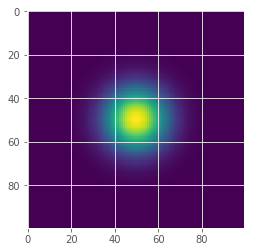

In [46]:
x = torch.linspace(-5, 5, 100)
mean = 0
sigma2 = 1
y = (1./np.sqrt(2*np.pi*sigma2))*np.exp(-(x-mean)**2/(2*sigma2))
print(y.size()), print(y.shape)
y = y.view(-1, 1)
y_t = y.transpose(0,1)
print(y.shape, y_t.shape)
gauss2d = y * y_t
plt.imshow(gauss2d)


(512, 512)


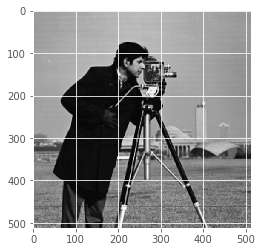

In [47]:
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 100, 100])
torch.Size([1, 1, 415, 415])


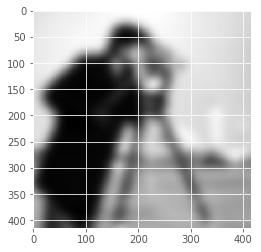

In [65]:
input = torch.from_numpy(img).unsqueeze(0).unsqueeze(0)
filter = gauss2d.unsqueeze(0).unsqueeze(0)
print(input.shape, filter.shape)
conv1 = F.conv2d(input,filter,padding=1)
print(conv1.shape)
plt.imshow(conv1.data.squeeze().numpy(), cmap='gray')